In [22]:
import pandas, seaborn, scipy, numpy, matplotlib

%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

In [31]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")
timepoint_paired_donors = set(d for d in sources.donor
                              if len(sources.ix[sources.donor == d].timepoint.unique()) > 1 )
timepoint_paired_donors
sources["timepoint_paired"] = sources.donor.isin(timepoint_paired_donors)
sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,timepoint_paired
source_id,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,True
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,True
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,False


In [5]:
mutations = pandas.read_csv("../data/mutations.csv.bz2")



/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [6]:
mutations["indel"] = mutations.ref.str.len() != mutations.alt.str.len()
#mutations["interesting"] = (mutations.context_mutation_3p5p == "C(C>A)C").astype(float)
mutations["interesting"] = (mutations.context_mutation == "C>A").astype(float)

mutations["interesting"].mean()

0.19014940634147676

In [33]:
sources["protein changing"] = muts_confident.ix[
    (mutations.effect.str.startswith("p."))
].groupby("source_id").donor.count().to_frame()["donor"]

sources["neoantigens"] = muts_confident.ix[
    (mutations.binding_affinity < 500)
].groupby("source_id").donor.count().to_frame()["donor"]

sources["expressed neoantigens"] = muts_confident.ix[
    (mutations.binding_affinity < 500) & (mutations.rna_alt_reads > 2)
].groupby("source_id").donor.count().to_frame()["donor"]

sources["mutations"] = muts_confident.groupby("source_id").donor.count().to_frame()["donor"]
sources["mutations_per_mb"] = sources.mutations * 1e6 / sources.library.map(library_sizes)

sources["indel"] = muts_confident.ix[
    mutations.indel
].groupby("source_id").donor.count().to_frame()["donor"]
sources.indel = sources.indel.fillna(0)

sources["interesting mutations"] = muts_confident.groupby("source_id").interesting.mean().to_frame()["interesting"] * 100.0

sources["group"] = sources.cohort + " " + sources.tissue_type
sources["treatment"] = sources.treated.map({True: "chemo treated", False: "treatment naive"})

sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,timepoint_paired,protein changing,neoantigens,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment
source_id,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,50,42,25,5937,1.977682,1,19.302678,AOCS solid,treatment naive
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,11,10,NaN,1532,0.510326,0,17.297650,AOCS solid,treatment naive
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,57,31,15,6786,2.260493,1,16.931919,AOCS solid,treatment naive
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,39,32,21,5703,1.899734,2,15.640891,AOCS solid,treatment naive
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,True,123,92,56,13626,4.538974,5,17.906943,AOCS ascites,chemo treated
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,True,74,54,25,6913,2.302798,4,18.429047,AOCS solid,treatment naive
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,116,66,35,15112,5.033977,0,11.348597,AOCS solid,treatment naive
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,56,39,6,7102,2.365756,1,20.909603,AOCS solid,treatment naive
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,45,40,NaN,6201,2.065623,5,19.593614,AOCS solid,treatment naive


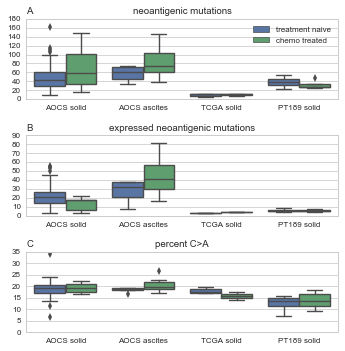

In [10]:
def format_figure():
    pyplot.xlabel("")
    pyplot.legend().remove()
    pyplot.ylim(ymin=0)

seaborn.set_context("paper")
seaborn.set_style("whitegrid")

pyplot.figure(figsize=(5,5))
grid=(3,1)

ax = pyplot.subplot2grid(grid,(0, 0), colspan=2)
pyplot.title("A", loc="left")
seaborn.boxplot(data=sources, x="group", y="neoantigens", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.legend(loc="upper right")
pyplot.title("neoantigenic mutations")
pyplot.ylabel("")

ax = pyplot.subplot2grid(grid,(1, 0))
#pyplot.title("Expressed mutations")
pyplot.title("B", loc="left")
#sub_data = sources[sources.cohort != "TCGA"]
sub_data = sources
seaborn.boxplot(data=sub_data, x="group", y="expressed neoantigens", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.title("expressed neoantigenic mutations")
pyplot.ylabel("")


ax = pyplot.subplot2grid(grid,(2, 0))
pyplot.title("C", loc="left")
seaborn.boxplot(data=sources, x="group", y="interesting mutations", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.tight_layout()
pyplot.title("percent C>A")
pyplot.ylabel("")

pyplot.savefig("../figures/fig1.pdf")



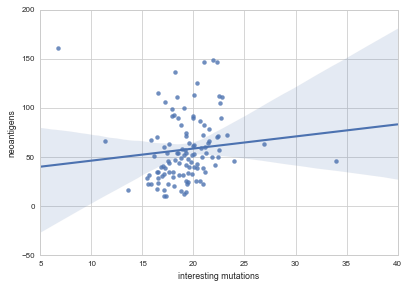

In [13]:
seaborn.regplot(data=sources[sources.cohort == "AOCS"], x="interesting mutations", y="neoantigens")

In [120]:
#seaborn.boxplot(data=sources, x="group", y="indel", hue="treatment", hue_order=("treatment naive", "chemo treated"))


In [ ]:
seaborn.boxplot(data=sources[sources.cohort == "AOCS"], x="group", y="interesting mutations", hue="treatment", hue_order=("treatment naive", "chemo treated"))


In [5]:
#mutations.ix[mutations.ind]

,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,...,context_mutation_5p,context_mutation_3p,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder
0,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,61407797,61407798,C,T,intergenic,...,G(C>T),(C>T)C,G(C>T)C,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False
1,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,61407797,61407798,C,T,intergenic,...,G(C>T),(C>T)C,G(C>T)C,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False
2,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,6,63262672,63262673,C,A,intergenic,...,C(C>A),(C>A)G,C(C>A)G,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False
3,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,6,63262672,63262673,C,A,intergenic,...,C(C>A),(C>A)G,C(C>A)G,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False
4,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,63487173,63487174,C,G,intronic,...,C(C>G),(C>G)T,C(C>G)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False
5,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,63487173,63487174,C,G,intronic,...,C(C>G),(C>G)T,C(C>G)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False
6,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68110672,68110673,A,T,intergenic,...,T(T>A),(T>A)T,T(T>A)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False
7,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,68110672,68110673,A,T,intergenic,...,T(T>A),(T>A)T,T(T>A)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False
8,AOCS-139-16/SP101896,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,intergenic,...,A(C>G),(C>G)A,A(C>G)A,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False
9,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,intergenic,...,A(C>G),(C>G)A,A(C>G)A,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
mutations.mutations.inde

In [108]:
mutations

,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,...,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,interesting,indel
0,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,61407797,61407798,C,T,intergenic,...,G(C>T)C,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False
1,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,61407797,61407798,C,T,intergenic,...,G(C>T)C,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False
2,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,6,63262672,63262673,C,A,intergenic,...,C(C>A)G,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False
3,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,6,63262672,63262673,C,A,intergenic,...,C(C>A)G,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False
4,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,63487173,63487174,C,G,intronic,...,C(C>G)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False
5,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,63487173,63487174,C,G,intronic,...,C(C>G)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False
6,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68110672,68110673,A,T,intergenic,...,T(T>A)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False
7,AOCS-139-16/SP101896,AOCS-139,0,GRCh37,18,68110672,68110673,A,T,intergenic,...,T(T>A)T,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False
8,AOCS-139-16/SP101896,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,intergenic,...,A(C>G)A,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False
9,AOCS-139-4/SP101906,AOCS-139,1,GRCh37,18,68385066,68385067,C,G,intergenic,...,A(C>G)A,mutations_with_mnvs mutations_with_mnvs mutati...,NaN,NaN,NaN,NaN,NaN,False,0,False


In [7]:
snv_affinities = numpy.log(mutations.ix[mutations.snv & (mutations.binding_affinity > 0)].binding_affinity)
non_snv_affinities = numpy.log(mutations.ix[(~ mutations.snv) & (mutations.binding_affinity > 0)].binding_affinity)
indel_affinities = numpy.log(mutations.ix[(mutations.indel) & (mutations.binding_affinity > 0)].binding_affinity)
mnv_affinities = numpy.log(mutations.ix[(~ mutations.indel) & (~mutations.snv) & (mutations.binding_affinity > 0)].binding_affinity)


scipy.stats.mannwhitneyu(snv_affinities, non_snv_affinities)


MannwhitneyuResult(statistic=3865487.5, pvalue=6.6145172164573229e-13)

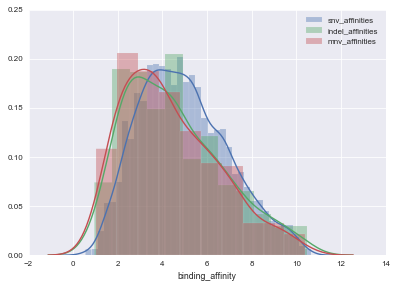

In [8]:
seaborn.distplot(snv_affinities, label="snv_affinities")
seaborn.distplot(indel_affinities, label="indel_affinities")
seaborn.distplot(mnv_affinities, label="mnv_affinities")
pyplot.legend()

In [9]:
mutations.ix[mutations.binding_affinity > 0].shape

(9972, 42)

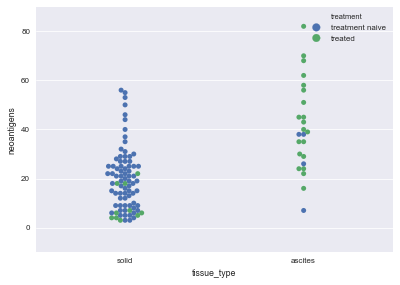

In [16]:
df = mutations.ix[~ mutations.rna_alt_reads.isnull()].ix[
    (
        (mutations.called == 1) |
        (
            (mutations.dna_alt_reads > 10)
        )
    )
    & mutations.binder
    & (mutations.rna_alt_reads > 2)
].groupby("source_id").donor.count().to_frame().reset_index()
df.index = df.source_id
#del df["source_id"]
df.columns = ["source_id", "neoantigens"]
df["donor"] = sources.donor[df.index]
df["treated"] = sources.treated[df.index]
df["treatment"] = df.treated.map({True: "treated", False: "treatment naive"})
df["tissue_type"] = sources.tissue_type[df.index]

seaborn.set_context('paper')
#seaborn.boxplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")
seaborn.swarmplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")


In [11]:
sum(~ mutations.rna_alt_reads.isnull())

518644

In [12]:
df

,source_id,neoantigens,donor,treated,treatment,tissue_type
source_id,,,,,,
AOCS-001-1/SP101515,AOCS-001-1/SP101515,26,AOCS-001,False,treatment naive,solid
AOCS-004-1/SP101519,AOCS-004-1/SP101519,16,AOCS-004,False,treatment naive,solid
AOCS-005-1/SP101521,AOCS-005-1/SP101521,22,AOCS-005,False,treatment naive,solid
AOCS-034-1/SP101523,AOCS-034-1/SP101523,26,AOCS-034,False,treatment naive,solid
AOCS-034-13/SP101524,AOCS-034-13/SP101524,59,AOCS-034,True,treated,ascites
AOCS-055-1/SP101526,AOCS-055-1/SP101526,37,AOCS-055,False,treatment naive,solid
AOCS-056-1/SP101528,AOCS-056-1/SP101528,7,AOCS-056,False,treatment naive,solid
AOCS-058-1/SP101532,AOCS-058-1/SP101532,19,AOCS-058,False,treatment naive,solid
AOCS-059-1/SP101536,AOCS-059-1/SP101536,10,AOCS-059,False,treatment naive,solid


In [42]:
sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,timepoint_paired,protein changing,neoantigens,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment
source_id,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,50,42,25,5937,1.977682,1,19.302678,AOCS solid,treatment naive
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,11,10,NaN,1532,0.510326,0,17.297650,AOCS solid,treatment naive
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,57,31,15,6786,2.260493,1,16.931919,AOCS solid,treatment naive
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,39,32,21,5703,1.899734,2,15.640891,AOCS solid,treatment naive
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,True,123,92,56,13626,4.538974,5,17.906943,AOCS ascites,chemo treated
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,True,74,54,25,6913,2.302798,4,18.429047,AOCS solid,treatment naive
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,116,66,35,15112,5.033977,0,11.348597,AOCS solid,treatment naive
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,56,39,6,7102,2.365756,1,20.909603,AOCS solid,treatment naive
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,45,40,NaN,6201,2.065623,5,19.593614,AOCS solid,treatment naive


In [70]:
def source_display_name(name):
    return name

def abbreviated_source_display_name(name):
    return (name.split('/')[0]
            .replace("primary_", "")
            .replace("secondary_", "")
            .replace("left", "L")
            .replace("right", "R")
            .replace("pelvic_sidewalls", "sidewalls")
            .replace("end_of_care", "final"))
    
source_display_name = abbreviated_source_display_name

def series_signficance(series):
    df = series.to_frame()
    (col,) = df.columns
    df["donor"] = sources.donor[df.index]
    df["treated"] = sources.treated[df.index]
    grouped = df.dropna().groupby(["donor", "treated"]).median().unstack().dropna()
    grouped["compare"] = (grouped[(col, False)] < grouped[(col, True)])
    counts = grouped["compare"].value_counts()
    print("Treated > untreated in %d of %d, p=%f" % (counts.get(True, 0), counts.sum(), scipy.stats.binom_test([counts.get(True, 0), counts.get(False, 0)])))
    counts
    
def plot_series(series, only_multiple=True, color_column='timepoint', use_hatch=False, figsize=(18,5), order='donor', legend_loc='upper right', legend=True, legend_bbox_to_anchor=None):
    if isinstance(series.tolist()[0], (list, numpy.ndarray)) and series.tolist()[0][0] in (True, False):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.mean(x) - numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
                ("high", [numpy.mean(x) + numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
        ]), index=series.index)
        df = df * 100.0
    elif isinstance(series.tolist()[0], (list, numpy.ndarray)):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.percentile(x, 5) for x in series]),
                ("high", [numpy.percentile(x, 95) for x in series]),
        ]), index=series.index)
    else:
        df = pandas.DataFrame({"value": series}, index=series.index)
    
    series_signficance(df.value)
    
    if order == 'donor':
        def sort_key(source):
            return (sources.ix[source].donor, sources.ix[source].interval_days, sources.ix[source].treated)
    elif order == 'num_sources':
         def sort_key(source):
            donor = sources.ix[source].donor
            num_treated = len([s for s in sources.index if sources.ix[s].donor == donor and sources.ix[s].treated])
            num_sources = len([s for s in sources.index if sources.ix[s].donor == donor])
            return (num_treated * -1, num_sources * -1, donor, sources.ix[source].interval_days, sources.ix[source].treated)
    else:
        raise ValueError("Unknown ordering %s" % order)
            
    sources_ordered = sorted(df.index.tolist(), key=sort_key)
    if only_multiple:
        sources_ordered = [
            s for s in sources_ordered if len(set(
                [sources.ix[other_source].treated for other_source in sources.ix[sources_ordered].ix[sources.donor == sources.ix[s].donor].index])) > 1
        ]
    
    df = df.ix[sources_ordered]

    adjacent_space = 0
    minor_space = 0
    major_space = 2
    bar_width = 2

    colors = []
    
    def color_and_hatch(info):
        color = None
        hatch = None
        primary_like = None
        if color_column == 'timepoint':
            primary_like = info['timepoint'] == "primary"    
        elif color_column == 'treated':
            primary_like = not info['treated'] == "primary"
        else:
            assert False
        
        if use_hatch:
            primary_color = seaborn.color_palette("deep")[0]
            recurrence_color = seaborn.color_palette("deep")[1]
            hatch = '/' if info['tissue_type'] == 'ascites' else None
            color = primary_color if primary_like else recurrence_color
        else:
            primary_colors = seaborn.color_palette("Blues")
            recurrence_colors = seaborn.color_palette("Greens")
            index = 3 if info['tissue_type'] == 'ascites' else -1
            color = (primary_colors if primary_like else recurrence_colors)[index]
        return (color, hatch)


    for source in sources_ordered:
        colors.append(color_and_hatch(sources.ix[source])[0])

    x_values = [bar_width]
    for (prev_source_i, source) in enumerate(sources_ordered[1:]):
        prev_source = sources_ordered[prev_source_i]
        x_increment = None
        if sources.ix[prev_source].donor != sources.ix[source].donor:
            x_increment = major_space
        elif sources.ix[prev_source].interval_days != sources.ix[source].interval_days:
            x_increment = minor_space
        else:
            x_increment = adjacent_space
        x_values.append(x_values[-1] + bar_width + x_increment)
    x_values = numpy.array(x_values)

    #seaborn.set_context("talk")
    #pyplot.figure(figsize=figsize)
    bars = pyplot.bar(
        x_values,
        df.value,
        bar_width,
        yerr=[df.value - df.low, df.high - df.value] if 'low' in df else None,
        error_kw={
            'ecolor': 'black',
            'capsize': 3,
            'elinewidth': 4
        },
        color = colors)
    for (bar, source) in zip(bars, sources_ordered):
        hatch = color_and_hatch(sources.ix[source])[1]
        if hatch is not None:
            bar.set_hatch(hatch)

    ax = pyplot.gca()
    pyplot.xticks(x_values + bar_width / 2, [source_display_name(s) for s in sources_ordered], rotation="vertical")
    pyplot.grid(False)
    ax.yaxis.grid(True, color='black', linestyle='--', linewidth=1)
    ax.patch.set_facecolor("None")
    pyplot.xlim(xmin=0, xmax=x_values.max() + bar_width + 5)

    #dummies = [ax.plot([], [], ls='-', c=c)[0] for c in color_map.values()]
    #ax.legend(dummies, [" ".join(tpl) for tpl in color_map], fontsize='xx-large', ncol=2)
    #ax.legend?

    if legend:
        class CustomLegend(object):
            def __init__(self, color, hatch=None):
                self.color = color
                self.hatch = hatch

            def legend_artist(self, legend, orig_handle, fontsize, handlebox):
                x0, y0 = handlebox.xdescent, handlebox.ydescent
                width, height = handlebox.width, handlebox.height
                patch = matplotlib.patches.Rectangle([x0, y0], width, height, facecolor=self.color,
                                           edgecolor=None, hatch=self.hatch, lw=0,
                                           transform=handlebox.get_transform())
                handlebox.add_artist(patch)
                return patch

        class PrimarySolidLegend(object):
            label = "primary solid" if color_column == 'timepoint' else "untreated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'solid'}))

        class RecurrenceSolidLegend(object):
            label = "recurrence solid" if color_column == 'timepoint' else "treated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'solid'}))

        class PrimaryAscitesLegend(object):
            label = "primary ascites" if color_column == 'timepoint' else "untreated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'ascites'}))

        class RecurrenceAscitesLegend(object):
            label = "recurrence ascites" if color_column == 'timepoint' else "treated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'ascites'}))

        legend_classes = [PrimarySolidLegend(), PrimaryAscitesLegend(), RecurrenceSolidLegend(), RecurrenceAscitesLegend()]


        leg = pyplot.legend(legend_classes, [x.label for x in legend_classes],
                      handler_map = dict((c, c.handler) for c in legend_classes),
                      bbox_to_anchor=legend_bbox_to_anchor,
                      loc=legend_loc, ncol=1)
        leg.set_frame_on(True)

#series = mutations_any_alt_reads.groupby("source_id")["donor"].count()
#plot_series(series, use_hatch=False)


Treated > untreated in 13 of 16, p=0.021271
Treated > untreated in 11 of 16, p=0.210114
Treated > untreated in 9 of 13, p=0.266846


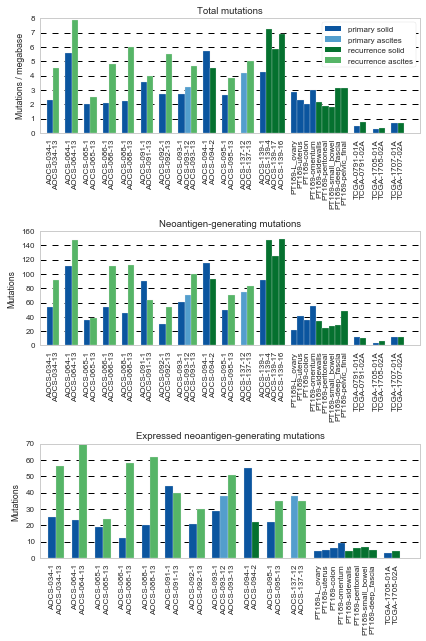

In [73]:
## Paired analyses
fig = pyplot.figure(figsize=(6,9))
seaborn.set_context('paper')
grid=(3,1)

ax = pyplot.subplot2grid(grid,(0, 0))
plot_series(sources[sources.timepoint_paired].mutations_per_mb.dropna(), legend_bbox_to_anchor=(1,1))
pyplot.title("Total mutations")
pyplot.ylabel("Mutations / megabase")

ax = pyplot.subplot2grid(grid,(1, 0))
plot_series(sources[sources.timepoint_paired].neoantigens.dropna(), legend=False)
pyplot.title("Neoantigen-generating mutations")
pyplot.ylabel("Mutations")


ax = pyplot.subplot2grid(grid,(2, 0))
plot_series(sources[sources.timepoint_paired]["expressed neoantigens"].dropna(), legend=False)
pyplot.title("Expressed neoantigen-generating mutations")
pyplot.ylabel("Mutations")

pyplot.tight_layout()

pyplot.savefig("../figures/paired_counts.pdf")


In [13]:
df.groupby(["tissue_type", "treatment"])["neoantigens"].mean()
df.groupby(["tissue_type", "treatment"])["source_id"].unique()

tissue_type  treatment      
ascites      treated            [AOCS-034-13/SP101524, AOCS-064-13/SP101554, A...
             treatment naive    [AOCS-093-12/SP101636, AOCS-137-12/SP101866, A...
solid        treated            [AOCS-077-1/SP101572, AOCS-094-2/SP106641, AOC...
             treatment naive    [AOCS-001-1/SP101515, AOCS-004-1/SP101519, AOC...
Name: source_id, dtype: object